# Problem Explanation

Remember that basic NN consists of two steps:
1. Going forward: activation function of each layer.
2. Going backward: calculating the error gradient and propagating it to the input layer and then, updating the parameters.

The problem here is that often times the gradients get smaller when we reach to lower layers and therefore, the weights remain quite similar to what they were and we never converge.

The gradients could also get bigger with each step and the algorithm diverges.

These two are called **Vanishing and Exploding** gradients respectively.

# The Reason Behind the Problem

This behavior was observed long ago but no one knew **why** it happened until in 2010, Glorot and Bengio found some reasons to this behavior.

One of them was the combination of "logistic activation function" and the popular "0-mean, 1-variance" weight initialization. This resulted into each layer's output variance being much bigger than its input variance.

Then by going deeper into the model, the variance keeps getting bigger and bigger and in the last layers, the activation function becomes "saturated" meaning that the gradient is close to 0 so backprop actually has no gradient to work with.

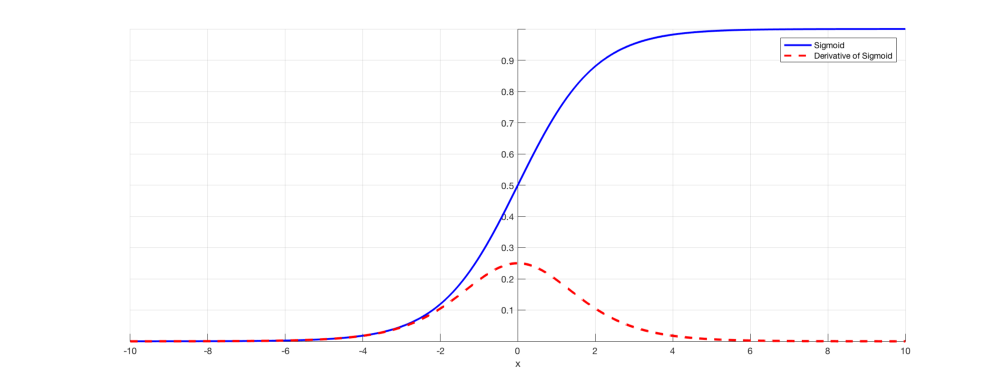

# How to Salvage

Various techniques and ideas exist for solving this problem such as:
1. Alternative weight initialization.
2. Alternative (which are non-saturating) activation functions.
3. Batch Normalization (next session)
4. Gradient clipping (for exploding gradients)
5. Layer-wise training
6. Unsupervised pre-training
7. And so on...

Here we will discuss the first two methods.

# Glorot, He, and LeCun Weight Initialization

Glorot and Bengio proposed a way to stop this problem using different method of weight initialization. They found out that for NN to work as expected (no vanishing/exploding grads), each layer's output variance should be equal to its input variance. This should be done for going forward AND backward and for that to happen, each layer's inputs (fan-in) should be equal to its neurons (fan-out).

They found an alternative way to compromise the above method that works great in practice. Each layer's connection weights should be initialized randomly under **one of these** conditions:

1. Normal dist with mean = 0, variance = ${1 / fan_{avg}}$
2. Uniform dist between $-\sqrt{{3} / {fan_{avg}}}$ and $\sqrt{{3} / {fan_{avg}}}$

This method is useful for some activation functions. You can other activation functions in this list: 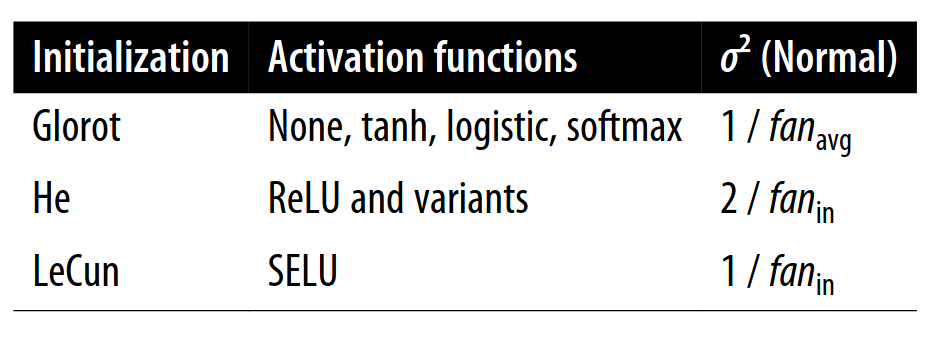

# Non-Saturating Activation Functions

The problem still existed even after changing the initialization method. So, they started to look at other activation functions. The most famous one is ReLU which is $max(0, x)$. 

Turns out that ReLU isn't perfect and suffers from a problem called "dying ReLUs". To solve this, "Leaky ReLUs" and introduced which is $max(\alpha x, x)$

Two version of leaky ReLUs:
1. Randomized leaky ReLU: $\alpha$ is chosen randomly at the start and fixed to an average value during testing.
2. Parametric leaky ReLU: $\alpha$ is treated like a parameter and can be updated by backprop.

In 2015, ELU was introduced:
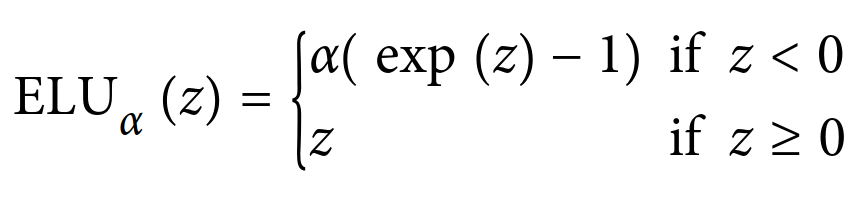

ELU converges faster than ReLU but it's slower to computer, specially at test time.

Last but not least, we have SELU which is the scaled version of ELU. It's exactly like ELU but the result is multiplied by a coefficient.

SELU is said to self-normalize the network. Meaning that the output of each layer keeps a mean of 0 and a variance of 1.

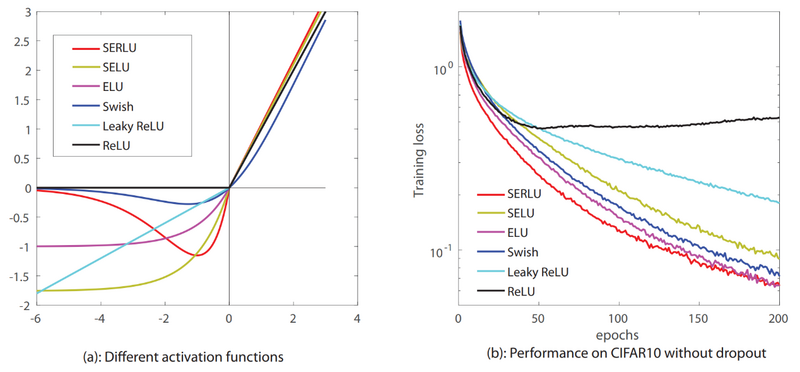

# Which activation function to use?

In general, the following rule applies:
$$
SELU > ELU > leaky ReLU > ReLU > tanh > logistic
$$

But take these into consideration:
1. If your architecture prevents self-normalizing, then ELU may be better than SELU.
2. If you want runtime latency, leaky ReLU is better.
3. Parametric ReLU when you have a huge training set.
4. If you have some time, use cross-validation to evaluate other activations like RReLU or PReLU.